In [1]:
!pip install yfinance
!pip install pandas_ta

     |████████████████████████████████| 6.3 MB 19.3 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=cd0ed5e0bf1f8fa489f8775c75f5d51c27a91b7702accb035ce82e54cf690f9d
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 115 kB 13.2 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=0b5023382b6dce0dad51bf8def47178e66c271f4bde65c0cd7c494e680e4be07
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [3]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import pandas_ta as ta
import yfinance as yf

In [148]:
# Request historic pricing data via finance.yahoo.com API
df = yf.Ticker('AAPL').history(period='1y', interval='1d')#[['Close', 'Open', 'High', 'Volume']]

In [149]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-07,113.887492,114.811549,113.400618,114.344551,96849000,0.0,0
2020-10-08,115.507079,115.656122,113.857684,114.235260,83477200,0.0,0
2020-10-09,114.543271,116.252280,114.185571,116.222473,100506900,0.0,0
2020-10-12,119.292728,124.380010,118.517713,123.604996,240226800,0.0,0
2020-10-13,124.469437,124.588673,118.885357,120.326088,262330500,0.0,0
...,...,...,...,...,...,...,...
2021-09-30,143.660004,144.380005,141.279999,141.500000,88934200,0.0,0
2021-10-01,141.899994,142.919998,139.110001,142.649994,94639600,0.0,0
2021-10-04,141.759995,142.210007,138.270004,139.139999,98322000,0.0,0


In [150]:
fig = make_subplots(rows=1, cols=1)
# Candlestick chart for pricing
fig.append_trace(
    go.Scatter(
        x=df.index,
        y=df['Open'],
        line=dict(color='#ff9900', width=1),
        name='open',
        # showlegend=False,
        legendgroup='1',
    ), row=1, col=1
)
fig.append_trace(
    go.Candlestick(
        x=df.index,
        open=df['Open'],
        high=df['High'],
        low=df['Low'],
        close=df['Close'],
        increasing_line_color='#ff9900',
        decreasing_line_color='black',
        showlegend=False
    ), row=1, col=1
)
# Make it pretty
layout = go.Layout(
    plot_bgcolor='#efefef',
    # Font Families
    font_family='Monospace',
    font_color='#000000',
    font_size=20,
    xaxis=dict(
        rangeslider=dict(
            visible=False
        )
    )
)

fig.update_layout(layout)
fig.show()

In [151]:
df.diff()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-10-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-08,1.619587,0.844573,0.457066,-0.109291,-13371800.0,0.0,0.0
2020-10-09,-0.963808,0.596159,0.327888,1.987213,17029700.0,0.0,0.0
2020-10-12,4.749456,8.127730,4.332142,7.382523,139719900.0,0.0,0.0
2020-10-13,5.176710,0.208663,0.367644,-3.278908,22103700.0,0.0,0.0
...,...,...,...,...,...,...,...
2021-09-30,1.190002,-0.069992,-0.750000,-1.330002,14332200.0,0.0,0.0
2021-10-01,-1.760010,-1.460007,-2.169998,1.149994,5705400.0,0.0,0.0
2021-10-04,-0.139999,-0.709991,-0.839996,-3.509995,3682400.0,0.0,0.0


In [152]:
df["Diff Close"] = df["Close"].diff(periods=20)

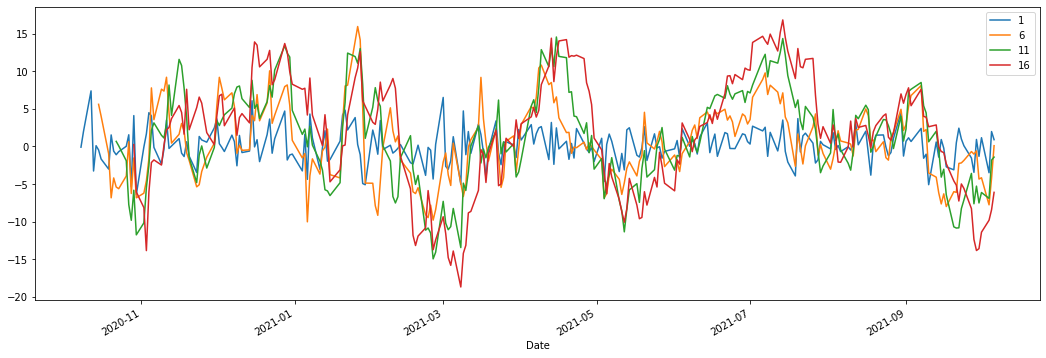

In [153]:
from matplotlib import pyplot as plt
plt.figure(figsize=[18,6])
for i in range(1,21,5):
    df["Close"].diff(periods=i).plot(label=i)
#df["Diff Close"].plot()
plt.legend()
plt.show()

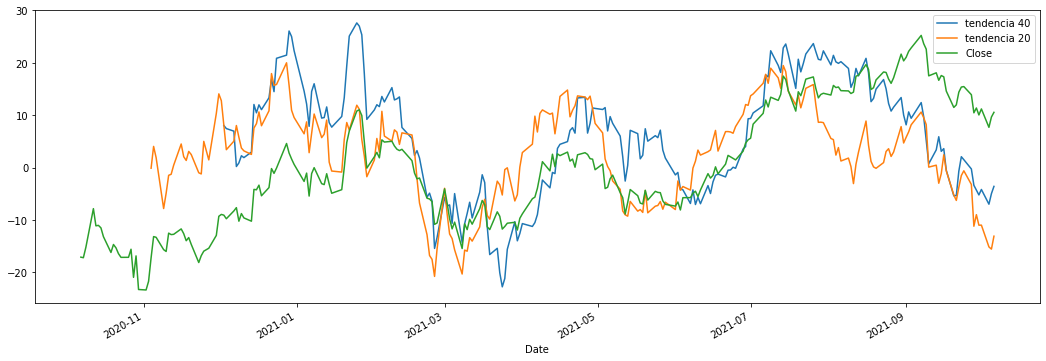

In [154]:
plt.figure(figsize=[18,6])
df["Close"].diff(periods=40).plot(label="tendencia 40")
df["Close"].diff(periods=20).plot(label="tendencia 20")
(df["Close"] - df["Close"].mean()).plot(label="Close")
plt.legend()
plt.show()

In [155]:
for period in range(1,20):
    #simulamos la ganancia en un rango de tiempo determinado para período = i
    #Obtener el valor óptimo de período
    #Indicar la ganancia obtenida porcentual
    pass

In [156]:
df["MA10"] = df[["Close"]].ta.sma(10)

In [157]:
df["MA50"] = df[["Close"]].ta.sma(50)

In [158]:
df["Diff MA"] = df["MA10"] - df["MA50"]

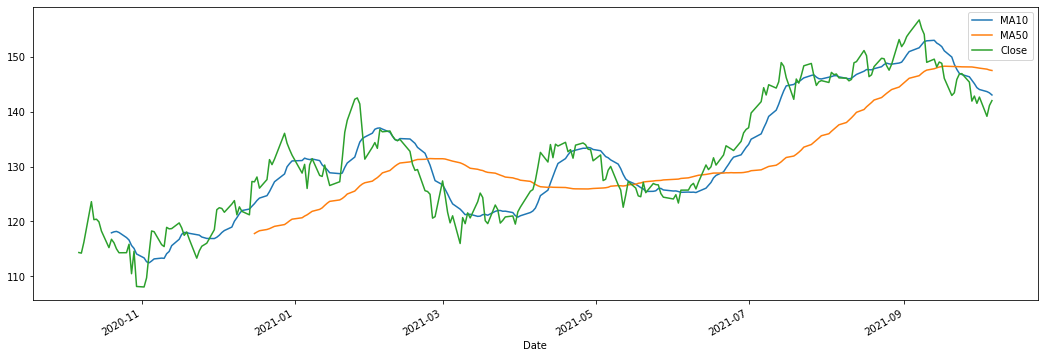

In [159]:
plt.figure(figsize=[18,6])
df["MA10"].plot(label="MA10")
df["MA50"].plot(label="MA50")
df["Close"].plot(label="Close")
plt.legend()
plt.show()

In [160]:
df = df.fillna(0)

In [161]:
df["shares"] = [1 if df.loc[ei,"MA10"]>df.loc[ei,"MA50"] else 0 for ei in df.index]

In [162]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Diff Close,MA10,MA50,Diff MA,shares
Date,,,,,,,,,,,,
2020-10-07,113.887492,114.811549,113.400618,114.344551,96849000,0.0,0,0.000000,0.000000,0.000000,0.000000,0
2020-10-08,115.507079,115.656122,113.857684,114.235260,83477200,0.0,0,0.000000,0.000000,0.000000,0.000000,0
2020-10-09,114.543271,116.252280,114.185571,116.222473,100506900,0.0,0,0.000000,0.000000,0.000000,0.000000,0
2020-10-12,119.292728,124.380010,118.517713,123.604996,240226800,0.0,0,0.000000,0.000000,0.000000,0.000000,0
2020-10-13,124.469437,124.588673,118.885357,120.326088,262330500,0.0,0,0.000000,0.000000,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30,143.660004,144.380005,141.279999,141.500000,88934200,0.0,0,-11.009995,144.364000,147.990494,-3.626494,0
2021-10-01,141.899994,142.919998,139.110001,142.649994,94639600,0.0,0,-11.000000,144.023000,147.911886,-3.888887,0
2021-10-04,141.759995,142.210007,138.270004,139.139999,98322000,0.0,0,-15.160004,143.642999,147.727931,-4.084932,0


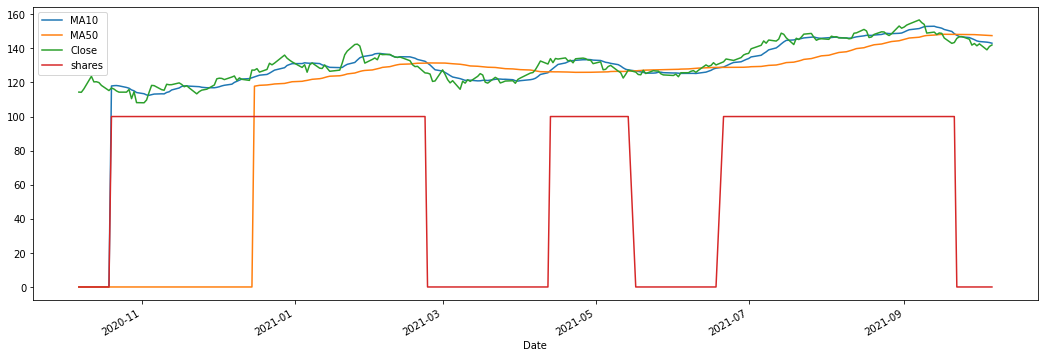

In [163]:
plt.figure(figsize=[18,6])
df["MA10"].plot(label="MA10")
df["MA50"].plot(label="MA50")
df["Close"].plot(label="Close")
(df["shares"]*100).plot(label="shares")
plt.legend()
plt.show()

In [164]:
df["Close1"]= df["Close"].shift(-1)

In [165]:
df["profit"] = [df.loc[ei,"Close1"] - df.loc[ei,"Close"] if df.loc[ei,"shares"]==1 else 0 for ei in df.index ]

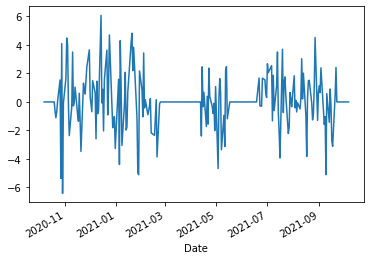

In [166]:
df["profit"].plot()

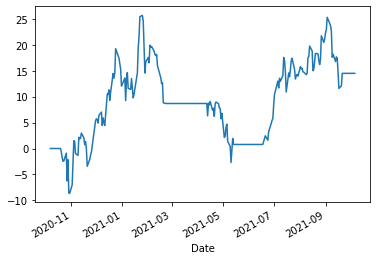

In [167]:
df["profit"].cumsum().plot()

In [168]:
df["EMA12"] = df['Close'].ewm(span=12, adjust=False, min_periods=12).mean()

In [169]:
df["EMA26"] = df['Close'].ewm(span=26, adjust=False, min_periods=26).mean()

In [170]:
df["MACD"] = df["EMA12"] - df["EMA26"]

In [171]:
df["Signal"] = df["MACD"].rolling(9).mean()

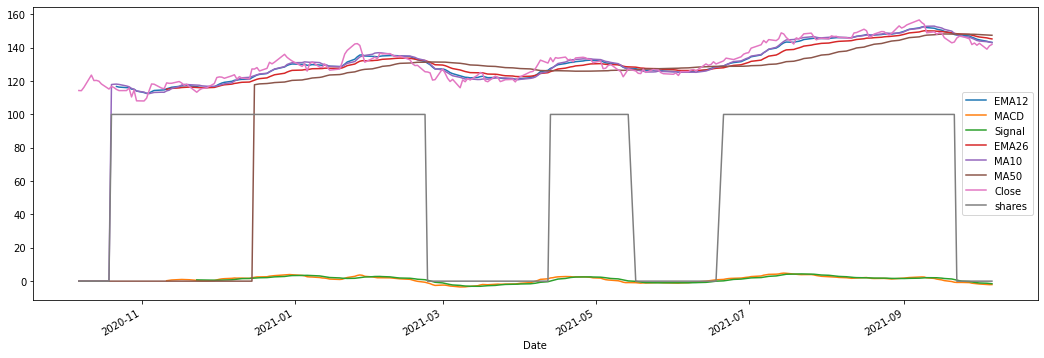

In [172]:
plt.figure(figsize=[18,6])
df["EMA12"].plot(label="EMA12")
df["MACD"].plot(label="MACD")
df["Signal"].plot(label="Signal")
df["EMA26"].plot(label="EMA26")
df["MA10"].plot(label="MA10")
df["MA50"].plot(label="MA50")
df["Close"].plot(label="Close")
(df["shares"]*100).plot(label="shares")
plt.legend()
plt.show()

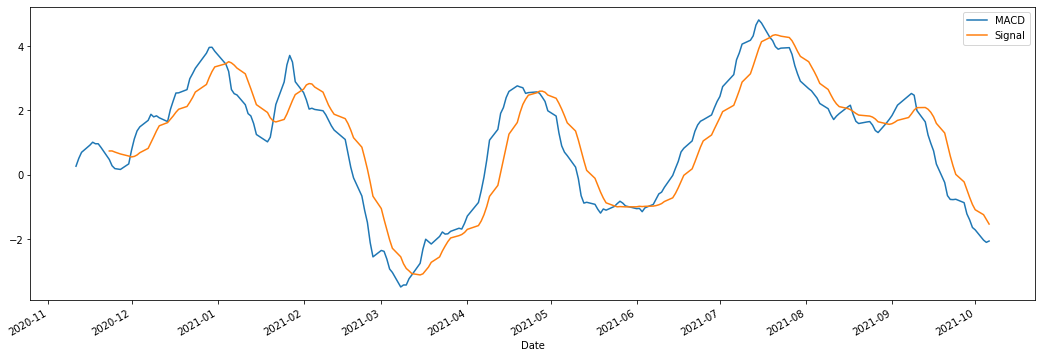

In [173]:
plt.figure(figsize=[18,6])
df["MACD"].plot(label="MACD")
df["Signal"].plot(label="Signal")
plt.legend()
plt.show()

In [174]:
df["Hist MACD"] = df["MACD"] - df["Signal"]

In [175]:
df["shares MACD"] = [1 if df.loc[ei, "Hist MACD"]>0 else 0 for ei in df.index]

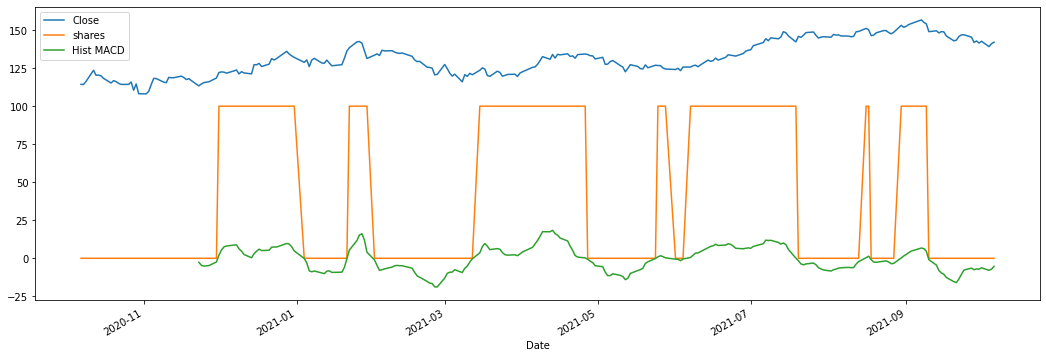

In [176]:
plt.figure(figsize=[18,6])
df["Close"].plot(label="Close")
(df["shares MACD"]*100).plot(label="shares")
(df["Hist MACD"]*10).plot(label="Hist MACD")
plt.legend()
plt.show()

In [177]:
df["profit MACD"] = [df.loc[ei,"Close1"] - df.loc[ei,"Close"] if df.loc[ei,"shares MACD"]==1 else 0 for ei in df.index ]

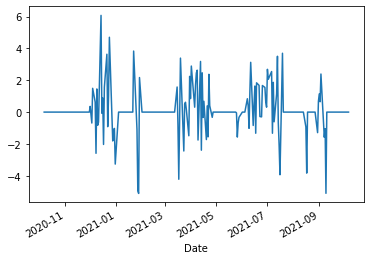

In [178]:
df["profit MACD"].plot()

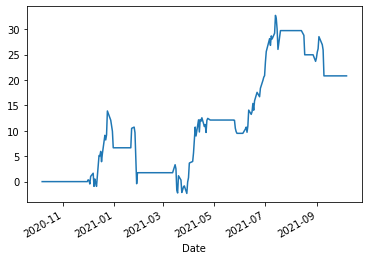

In [179]:
df["profit MACD"].cumsum().plot()

In [180]:
df["profit MACD"].sum()

20.812240600585938

In [181]:
df.ta.macd(append=True)

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
Date,,,
2020-10-07,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN
2020-10-13,NaN,NaN,NaN
...,...,...,...
2021-09-30,-1.644055,-0.823885,-0.820171
2021-10-01,-1.718494,-0.718659,-0.999835
2021-10-04,-2.037231,-0.829917,-1.207315


In [182]:
df["MACDh_12_26_9"]

Date
2020-10-07         NaN
2020-10-08         NaN
2020-10-09         NaN
2020-10-12         NaN
2020-10-13         NaN
                ...   
2021-09-30   -0.823885
2021-10-01   -0.718659
2021-10-04   -0.829917
2021-10-05   -0.719417
2021-10-06   -0.543001
Name: MACDh_12_26_9, Length: 252, dtype: float64

In [183]:
df["profit MACD_ta"] = [df.loc[ei,"Close1"] - df.loc[ei,"Close"] if df.loc[ei,"MACDh_12_26_9"]>0 else 0 for ei in df.index ]

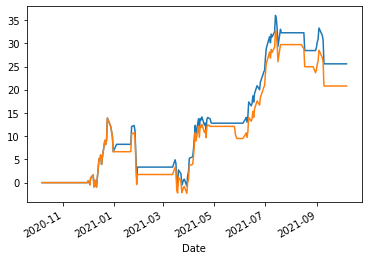

In [184]:
df["profit MACD_ta"].cumsum().plot()
df["profit MACD"].cumsum().plot()

In [185]:
a = df.ta

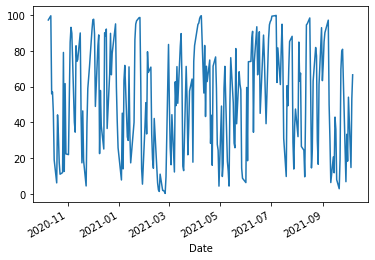

In [186]:
a.rsi(2).plot()

In [187]:
a.bbands()

,BBL_5_2.0,BBM_5_2.0,BBU_5_2.0,BBB_5_2.0,BBP_5_2.0
Date,,,,,
2020-10-07,NaN,NaN,NaN,NaN,NaN
2020-10-08,NaN,NaN,NaN,NaN,NaN
2020-10-09,NaN,NaN,NaN,NaN,NaN
2020-10-12,NaN,NaN,NaN,NaN,NaN
2020-10-13,110.414500,117.746674,125.078847,12.454150,0.675897
...,...,...,...,...,...
2021-09-30,139.514764,143.706000,147.897236,5.833071,0.236832
2021-10-01,140.154318,142.851999,145.549680,3.776889,0.462560
2021-10-04,138.956786,141.606000,144.255214,3.741669,0.034579


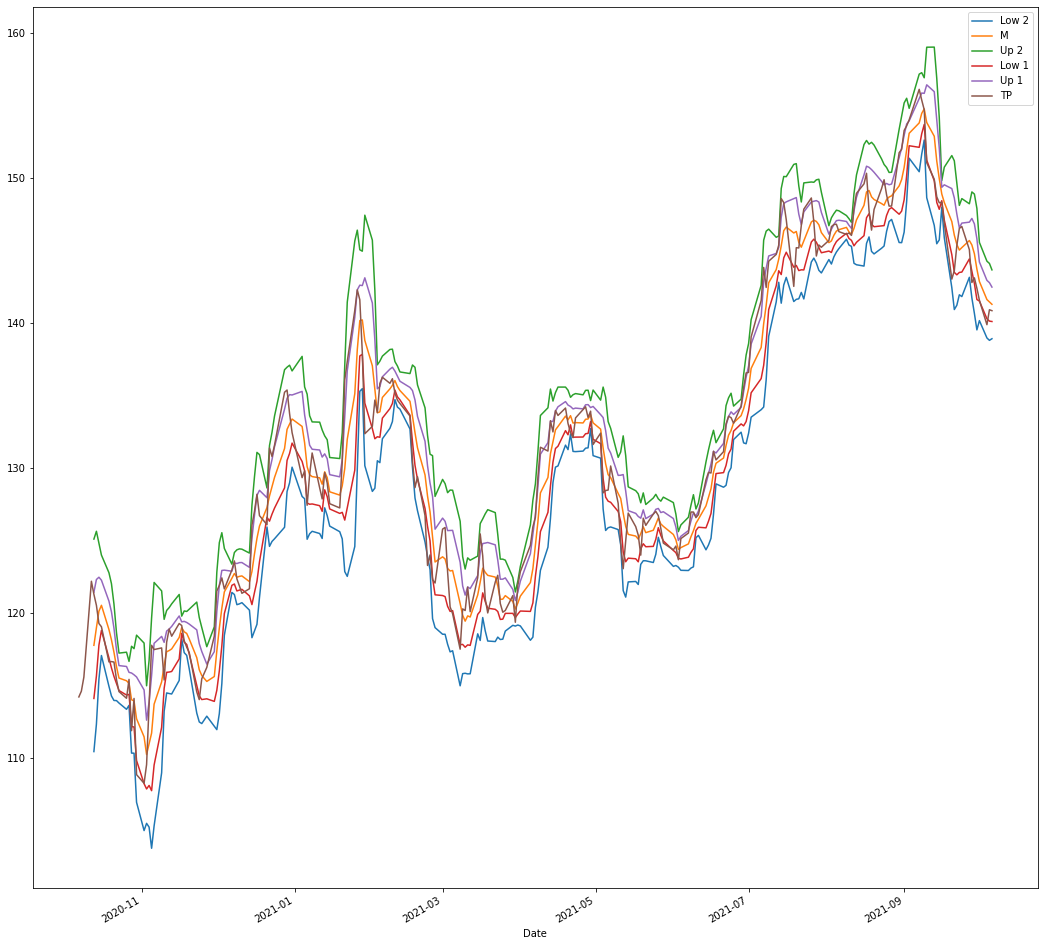

In [188]:
plt.figure(figsize=(18,18))
df.ta.bbands(5,2)["BBL_5_2.0"].plot(label="Low 2")
df.ta.bbands(5,2)["BBM_5_2.0"].plot(label="M")
df.ta.bbands(5,2)["BBU_5_2.0"].plot(label="Up 2")
df.ta.bbands(5,1)["BBL_5_1.0"].plot(label="Low 1")
df.ta.bbands(5,1)["BBU_5_1.0"].plot(label="Up 1")
((df["Close"]+df["High"]+df["Low"])/3).plot(label="TP")
plt.legend()
plt.show()